#  Анализ главных компонент.

До сих пор мы подробно изучали оценщики обучения с учителем: те оценщики, которые предсказывают метки на основе размеченных обучающих данных.
Здесь мы начинаем рассматривать несколько неконтролируемых оценщиков, которые могут выделить интересные аспекты данных без ссылки на какие-либо известные метки.

В этом разделе мы исследуем, возможно, один из наиболее широко используемых неконтролируемых алгоритмов — анализ основных компонентов (PCA).
PCA — это, по сути, алгоритм уменьшения размерности, но он также может быть полезен в качестве инструмента для визуализации, фильтрации шума, извлечения и проектирования признаков и многого другого.
После краткого концептуального обсуждения алгоритма PCA мы увидим пару примеров этих дополнительных приложений.

Начнем со стандартного импорта:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Введение в анализ главных компонентов

Анализ основных компонентов — это быстрый и гибкий неконтролируемый метод уменьшения размерности данных, который мы кратко рассмотрели в [Введение в Scikit-Learn] (05.02-Введение-Scikit-Learn.ipynb).
Его поведение проще всего визуализировать, взглянув на двумерный набор данных.
Рассмотрим следующие 200 пунктов:

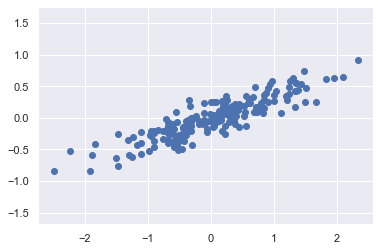

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

На глаз видно, что существует почти линейная зависимость между переменными x и y.
Это напоминает данные линейной регрессии, которые мы исследовали в [Подробно: линейная регрессия] (05.06-Linear-Regression.ipynb), но постановка задачи здесь немного отличается: вместо того, чтобы пытаться *предсказать* значения y из x значений, задача неконтролируемого обучения пытается узнать о *отношении* между значениями x и y.

В анализе основных компонентов эта взаимосвязь количественно определяется путем нахождения списка *главных осей* в данных и использования этих осей для описания набора данных.
Используя оценщик ``PCA`` Scikit-Learn, мы можем вычислить это следующим образом:

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Подгонка изучает некоторые величины из данных, в первую очередь «компоненты» и «объясненную дисперсию»:

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Чтобы понять, что означают эти числа, давайте визуализируем их как векторы над входными данными, используя «компоненты» для определения направления вектора и «объясненную дисперсию» для определения квадрата длины вектора.:

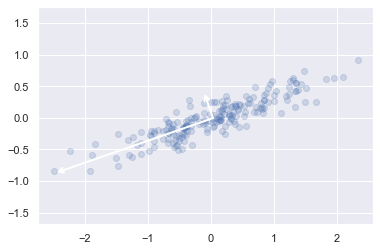

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Эти векторы представляют собой *главные оси* данных, а длина вектора указывает на то, насколько "важна" эта ось для описания распределения данных, точнее, это мера дисперсии данных. при проецировании на эту ось.
Проекция каждой точки данных на главные оси является «основными компонентами» данных.

Если мы построим эти основные компоненты рядом с исходными данными, мы увидим графики, показанные здесь:

![](figures/05.09-PCA-rotation.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Principal-Components-Rotation)

Это преобразование от осей данных к главным осям является *аффинным преобразованием*, что в основном означает, что оно состоит из переноса, поворота и равномерного масштабирования.

Хотя этот алгоритм для поиска основных компонентов может показаться просто математическим курьезом, оказывается, что он имеет очень далеко идущие приложения в мире машинного обучения и исследования данных.

### PCA как уменьшение размерности

Использование PCA для уменьшения размерности включает в себя обнуление одного или нескольких наименьших главных компонентов, что приводит к проекции данных с меньшим размером, которая сохраняет максимальную дисперсию данных.

Вот пример использования PCA в качестве преобразования уменьшения размерности:

In [25]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Преобразованные данные были сведены к одному измерению.
Чтобы понять эффект этого уменьшения размерности, мы можем выполнить обратное преобразование этих сокращенных данных и построить их вместе с исходными данными:

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 16

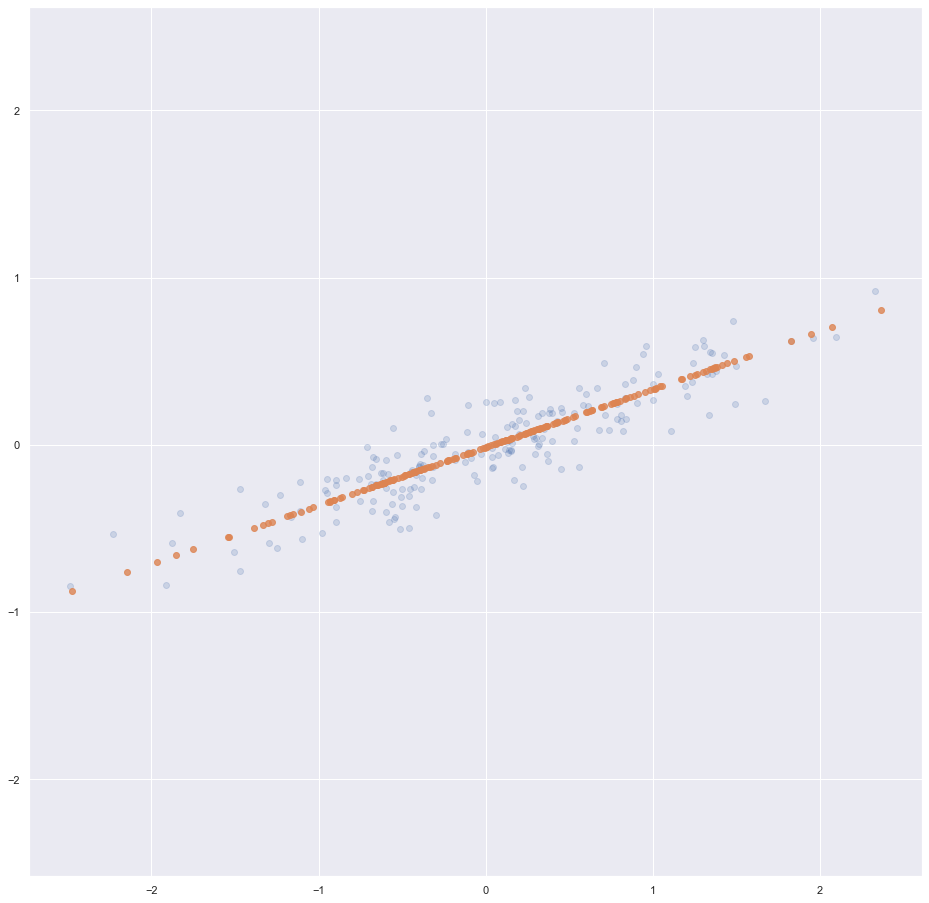

In [27]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Светлые точки — это исходные данные, а темные точки — спроецированная версия.
Это проясняет, что означает уменьшение размерности PCA: информация вдоль наименее важной главной оси или осей удаляется, оставляя только компонент(ы) данных с наибольшей дисперсией.
Вырезанная доля дисперсии (пропорциональная разбросу точек вокруг линии, образованной на этом рисунке) является примерной мерой того, сколько «информации» отбрасывается при этом уменьшении размерности.

Этот набор данных с уменьшенной размерностью в некотором смысле «достаточно хорош» для кодирования наиболее важных взаимосвязей между точками: несмотря на уменьшение размерности данных на 50%, общая взаимосвязь между точками данных в основном сохраняется.

### PCA для визуализации: рукописные цифры

Полезность уменьшения размерности может быть не совсем очевидна только для двух измерений, но становится намного более очевидной при рассмотрении многомерных данных.
Чтобы увидеть это, давайте кратко рассмотрим применение PCA к цифровым данным, которые мы видели в [Подробно: деревья решений и случайные леса] (05.08-Random-Forests.ipynb).

Начнем с загрузки данных:

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Напомним, что данные состоят из изображений размером 8×8 пикселей, что означает, что они 64-мерные.
Чтобы получить некоторое представление о взаимосвязях между этими точками, мы можем использовать PCA, чтобы спроецировать их на более управляемое количество измерений, скажем, на два:

In [29]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Теперь мы можем построить первые два основных компонента каждой точки, чтобы узнать о данных:

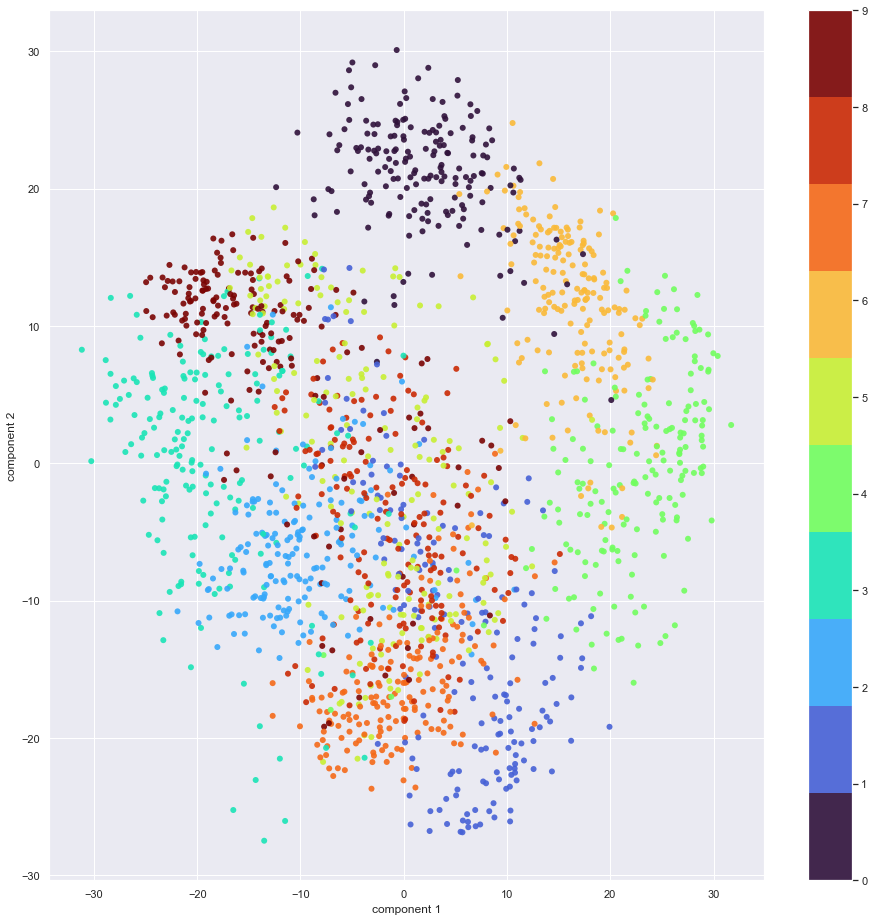

In [30]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('turbo', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Вспомните, что означают эти компоненты: полные данные представляют собой 64-мерное облако точек, и эти точки представляют собой проекции каждой точки данных по направлениям с наибольшей дисперсией.
По сути, мы нашли оптимальное растяжение и вращение в 64-мерном пространстве, позволяющее увидеть расположение цифр в двух измерениях, и сделали это неконтролируемым образом, то есть без привязки к меткам.

### 1 020 / 5 000
Результаты перевода
Что означают компоненты?

Здесь мы можем пойти немного дальше и начать спрашивать, что *означают* уменьшенные размеры.
Это значение можно понять с точки зрения комбинаций базисных векторов.
Например, каждое изображение в обучающем наборе определяется набором из 64 значений пикселей, который мы назовем вектором $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

Один из способов, которым мы можем думать об этом, — это пиксельная основа.
То есть для построения изображения мы умножаем каждый элемент вектора на описываемый им пиксель, а затем складываем результаты вместе для построения изображения:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

Один из способов уменьшения размерности этих данных — это обнуление всех этих базисных векторов, кроме нескольких.
Например, если мы используем только первые восемь пикселей, мы получаем восьмимерную проекцию данных, но она не очень хорошо отражает все изображение: мы выбросили почти 90% пикселей!

![](./figures/05.09-digits-pixel-components.png)


Верхний ряд панелей показывает отдельные пиксели, а нижний ряд показывает совокупный вклад этих пикселей в построение изображения.
Используя только восемь основных компонентов пикселя, мы можем построить только небольшую часть 64-пиксельного изображения.
Если бы мы продолжили эту последовательность и использовали все 64 пикселя, мы бы восстановили исходное изображени.

Но попиксельное представление — не единственный выбор основы. Мы также можем использовать другие базовые функции, каждая из которых содержит некоторый заранее определенный вклад каждого пикселя, и написать что-то вроде

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA можно рассматривать как процесс выбора оптимальных базисных функций, так что сложения только первых нескольких из них достаточно для подходящей реконструкции основной части элементов в наборе данных.
Основные компоненты, которые действуют как низкоразмерное представление наших данных, — это просто коэффициенты, которые умножают каждый из элементов в этом ряду.
На этом рисунке показано аналогичное изображение восстановления этой цифры с использованием среднего плюс первых восьми базовых функций PCA:

![](figures/05.09-digits-pca-components.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Digits-PCA-Components)

В отличие от пиксельного базиса, PCA-базис позволяет нам восстанавливать характерные особенности входного изображения, используя всего лишь среднее значение плюс восемь компонентов!
Количество каждого пикселя в каждом компоненте является следствием ориентации вектора в нашем двумерном примере.
Именно в этом смысле PCA обеспечивает низкоразмерное представление данных: он обнаруживает набор базисных функций, которые более эффективны, чем собственная пиксельная основа входных данных.

### Выбор количества компонентов

Жизненно важной частью использования PCA на практике является возможность оценить, сколько компонентов необходимо для описания данных.
Это можно определить, взглянув на кумулятивный *объясненный коэффициент дисперсии* как функцию количества компонентов:

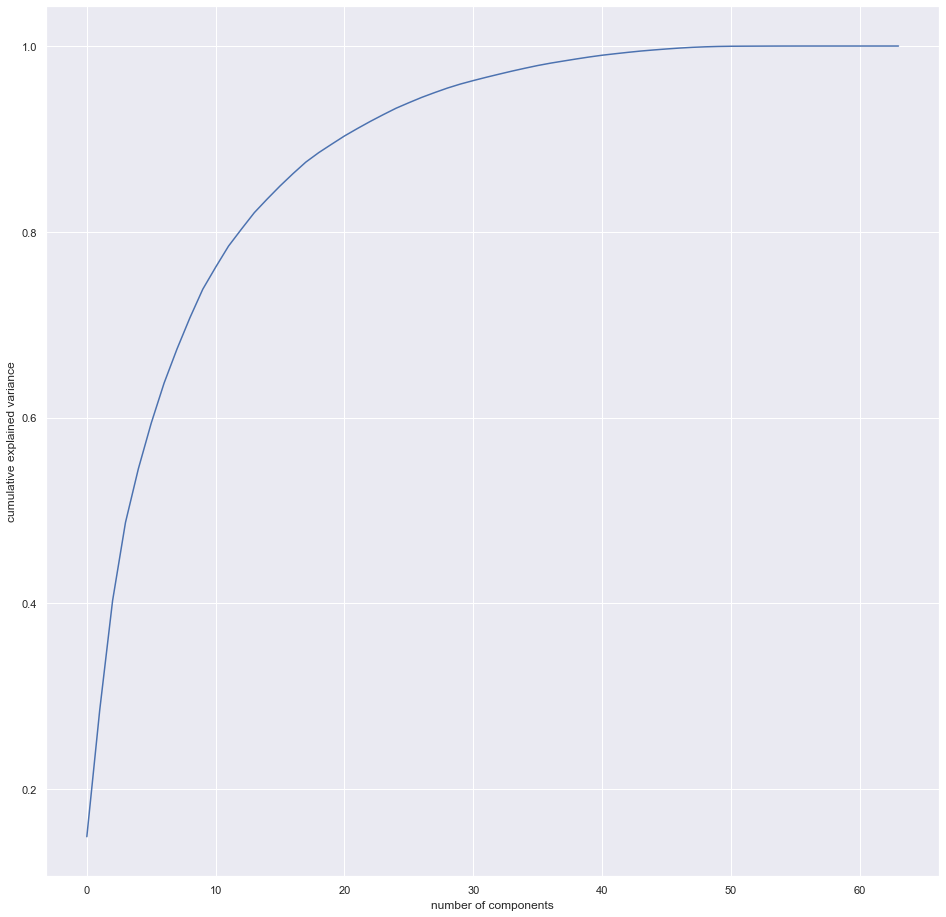

In [31]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Эта кривая количественно показывает, какая часть общей 64-мерной дисперсии содержится в первых $N$ компонентах.
Например, мы видим, что с цифрами первые 10 компонентов содержат примерно 75% дисперсии, в то время как вам нужно около 50 компонентов, чтобы описать почти 100% дисперсии.

Здесь мы видим, что наша двумерная проекция теряет много информации (измеряемой объясненной дисперсией) и что нам потребуется около 20 компонентов, чтобы сохранить 90% дисперсии. Глядя на этот график для многомерного набора данных, вы можете понять уровень избыточности, присутствующий в нескольких наблюдениях.

## PCA как фильтрация шума

PCA также можно использовать в качестве метода фильтрации зашумленных данных.
Идея такова: любые компоненты с дисперсией намного большей, чем влияние шума, должны быть относительно незатронуты шумом.
Поэтому, если вы реконструируете данные, используя только самое большое подмножество основных компонентов, вы должны преимущественно сохранять сигнал и отбрасывать шум.

Давайте посмотрим, как это выглядит с цифрами.
Сначала мы построим несколько входных данных без шума:

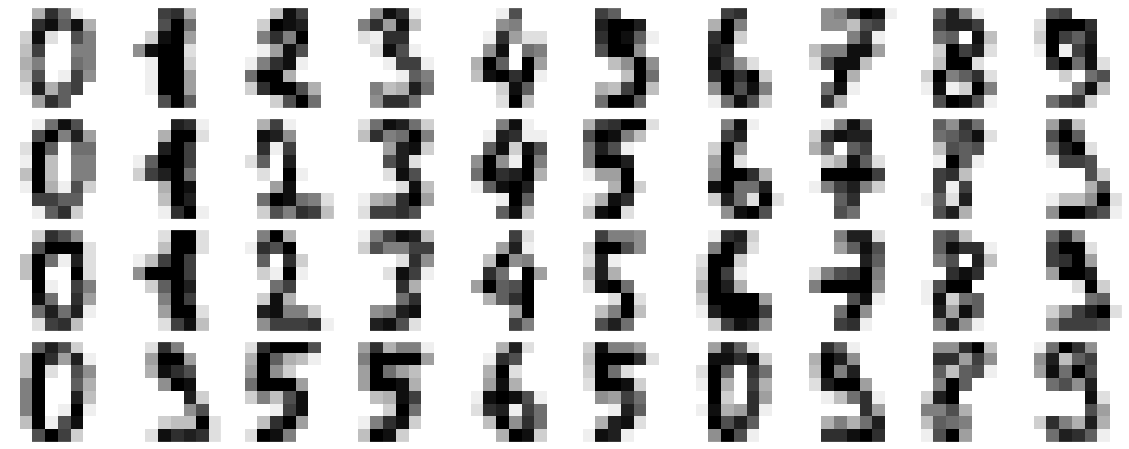

In [33]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(20, 8),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Теперь давайте добавим случайный шум, чтобы создать зашумленный набор данных, и перерисуем его:

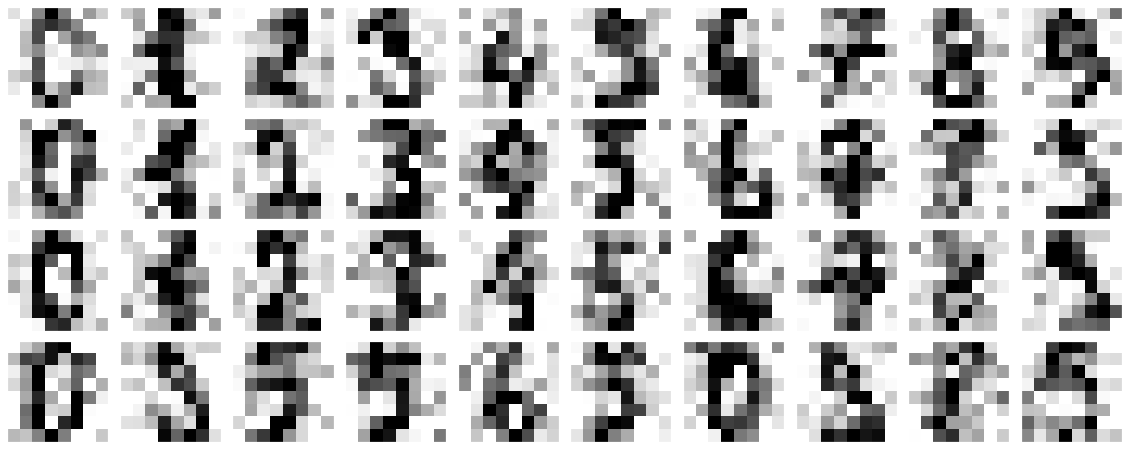

In [34]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

На глаз видно, что изображения зашумлены и содержат ложные пиксели.
Давайте обучим PCA на зашумленных данных, требуя, чтобы проекция сохраняла 50% дисперси

In [36]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Здесь 50% дисперсии составляют 12 главных компонент.
Теперь мы вычисляем эти компоненты, а затем используем обратное преобразование для восстановления отфильтрованных цифр:

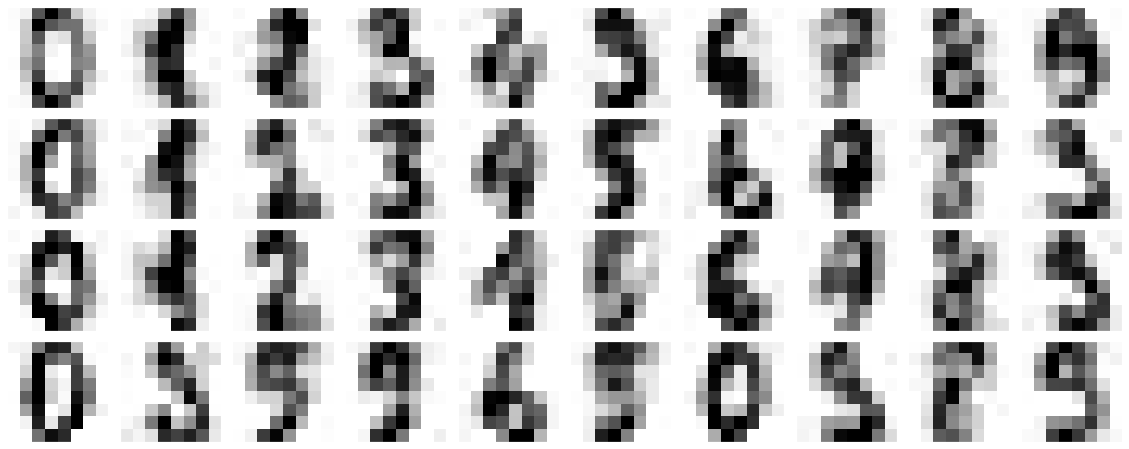

In [37]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

Это свойство сохранения сигнала/шумовой фильтрации делает PCA очень полезной процедурой выбора признаков — например, вместо обучения классификатора на данных очень высокой размерности вы можете вместо этого обучить классификатор на представлении более низкой размерности, которое будет автоматически служить для фильтрации. из случайного шума на входах.

## Пример: собственные лица

Ранее мы рассмотрели пример использования проекции PCA в качестве селектора признаков для распознавания лиц с помощью машины опорных векторов (см. [Подробно: машины опорных векторов](05.07-Support-Vector-Machines.ipynb)).
Здесь мы оглянемся назад и рассмотрим немного больше того, что вошло в это.
Напомним, что мы использовали набор данных Labeled Faces in the Wild, доступный через Scikit-Learn

In [38]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


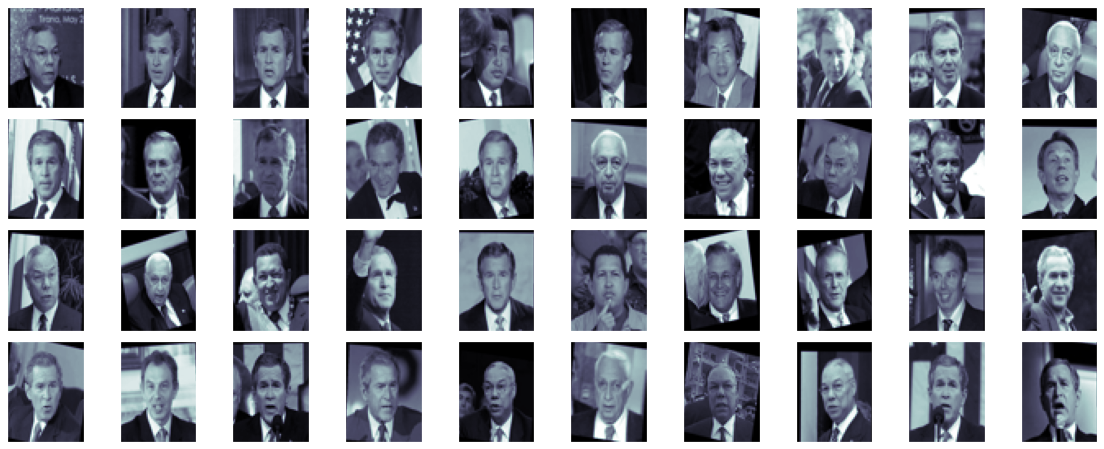

In [52]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(20, 8),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(62, 47),
                  cmap='bone',
                  clim=(0, 1))
plot_digits(faces.data)


In [63]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(faces.data)
print(faces.data.shape)
print(projected.shape)

(1348, 2914)
(1348, 2)


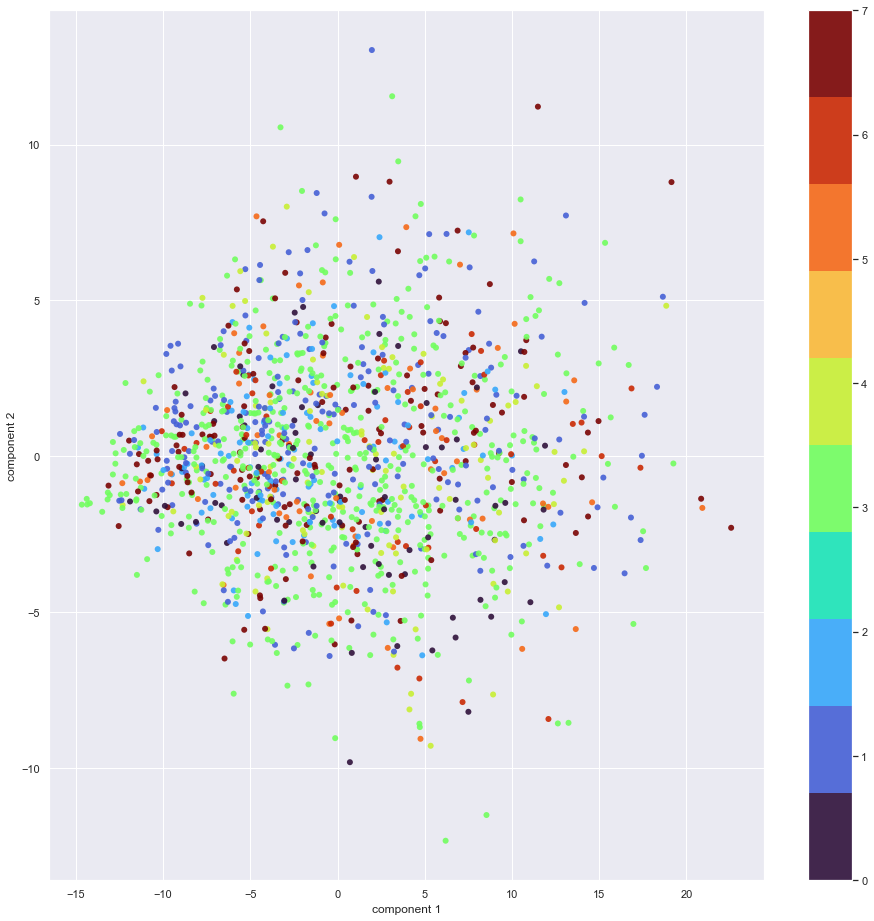

In [64]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=faces.target, edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('turbo', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Давайте посмотрим на основные оси, которые охватывают этот набор данных.
Так как это большой набор данных, мы будем использовать «RandomizedPCA» — он содержит рандомизированный метод для аппроксимации первых $N$ главных компонентов намного быстрее, чем стандартная оценка «PCA», и, таким образом, очень полезен для высоких значений. -размерные данные (здесь размерность около 3000).
Мы рассмотрим первые 150 компонентов:

In [55]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

В этом случае может быть интересно визуализировать изображения, связанные с первыми несколькими главными компонентами (эти компоненты технически известны как «собственные векторы», т.е.
поэтому эти типы изображений часто называют «собственными лицами»).
Как вы можете видеть на этом рисунке, они столь же жуткие, как и звучат:

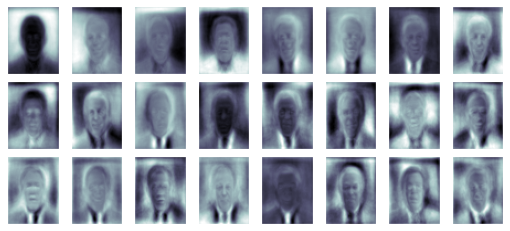

In [56]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Результаты очень интересны и дают нам представление о том, как меняются изображения: например, первые несколько собственных граней (вверху слева), по-видимому, связаны с углом освещения на грани, а более поздние главные векторы, похоже, выбираются. некоторые особенности, такие как глаза, нос и губы.
Давайте посмотрим на совокупную дисперсию этих компонентов, чтобы увидеть, сколько информации о данных сохраняет прогноз:

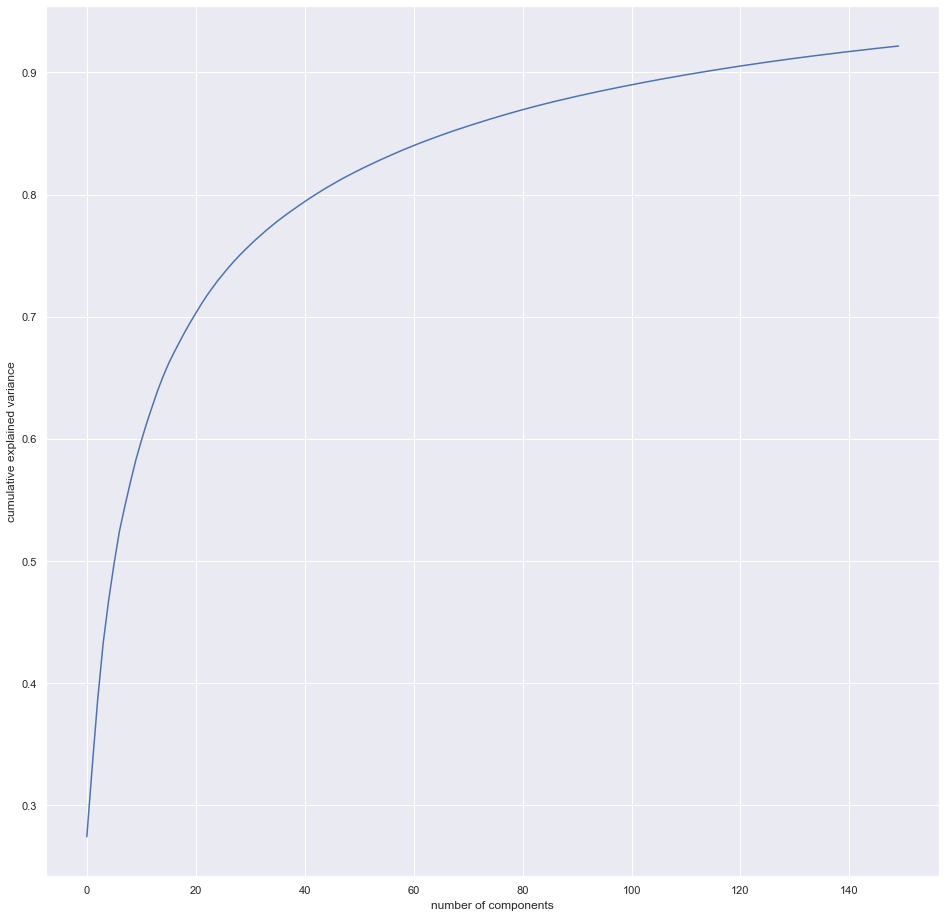

In [57]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Мы видим, что на эти 150 компонентов приходится чуть более 90% дисперсии.
Это навело бы нас на мысль, что, используя эти 150 компонентов, мы восстановим большинство основных характеристик данных.
Чтобы сделать это более конкретным, мы можем сравнить входные изображения с изображениями, восстановленными из этих 150 компонентов:

In [58]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

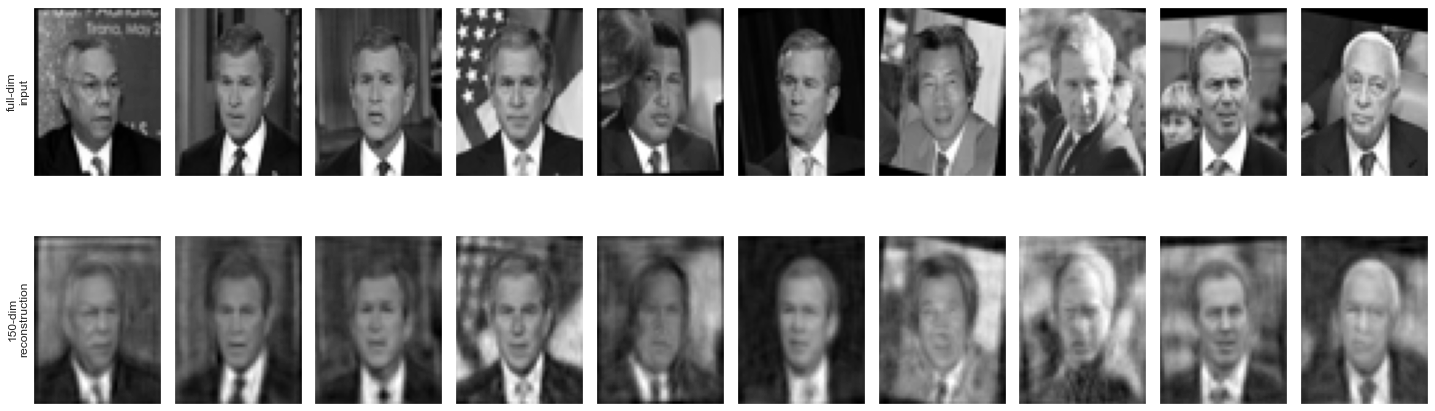

In [61]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(25, 8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

В верхнем ряду здесь показаны входные изображения, а в нижнем ряду — реконструкция изображений только по 150 из ~3000 исходных признаков.
Эта визуализация ясно показывает, почему выбор признаков PCA, использованный в [Углубленное: машины опорных векторов] (05.07-Support-Vector-Machines.ipynb), был настолько успешным: хотя он уменьшает размерность данных почти в 20 раз, проецируемые изображения содержат достаточно информации, чтобы мы могли на глаз распознать людей на изображении.
Это означает, что наш алгоритм классификации должен обучаться на 150-мерных данных, а не на 3000-мерных данных, что в зависимости от выбранного нами конкретного алгоритма может привести к гораздо более эффективной классификации.

## Резюме анализа основных компонентов

В этом разделе мы обсудили использование анализа главных компонент для уменьшения размерности, для визуализации многомерных данных, для фильтрации шума и для выбора признаков в многомерных данных.
Из-за универсальности и интерпретируемости PCA было показано, что он эффективен в самых разных контекстах и ​​дисциплинах.
Учитывая любой многомерный набор данных, я склонен начинать с PCA, чтобы визуализировать взаимосвязь между точками (как мы сделали с цифрами), понять основную дисперсию данных (как мы сделали с собственными гранями) и понять внутренняя размерность (путем построения объясненного коэффициента дисперсии).
Конечно, PCA полезен не для каждого многомерного набора данных, но он предлагает прямой и эффективный способ получить представление о многомерных данных.

Основная слабость PCA заключается в том, что на него сильно влияют выбросы в данных.
По этой причине было разработано много надежных вариантов PCA, многие из которых итеративно отбрасывают точки данных, которые плохо описываются исходными компонентами.
Scikit-Learn содержит несколько интересных вариантов PCA, в том числе RandomizedPCA и SparsePCA, оба также в подмодуле sklearn.decomposition.
``RandomizedPCA``, который мы видели ранее, использует недетерминированный метод для быстрой аппроксимации первых нескольких основных компонентов в очень многомерных данных, в то время как ``SparsePCA`` вводит член регуляризации (см. [Подробно: линейная регрессия ](05.06-Linear-Regression.ipynb)), который служит для обеспечения разреженности компонентов.

В следующих разделах мы рассмотрим другие методы обучения без учителя, основанные на некоторых идеях PCA.